In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import os, json, glob, geojson
from IPython.display import display, IFrame
import pyautogui

In [2]:
# Specify the URL of the webpage you want to display
url = "https://www.mapillary.com/app/?lat=38.88323553766739&lng=-104.78753932503264&z=14.4078285874988&trafficSign=all"

# Set the width and height of the iframe
width = "100%"
height = "400px"

# Embed the webpage within an iframe and display it
display(IFrame(url, width=width, height=height))

# Calculate iterations for snapshots

In [ ]:
# Input string
minimum_lat_long = "33.290347,-87.061055"
maximum_lat_long = "33.679452,-86.703068"

# Specify the city name
city_name = 'Miami'
country_name = 'USA'

# Create a directory with the city name
directory_path = os.path.join(os.getcwd(), city_name)

# Split the string into latitude and longitude
minimum_lat, minimum_long = minimum_lat_long.split(',')
maximum_lat, maximum_long = maximum_lat_long.split(',')

# Convert the latitude and longitude to float values if needed
minimum_lat = float(minimum_lat)
minimum_long = float(minimum_long)
maximum_lat = float(maximum_lat)
maximum_long = float(maximum_long)

# Calculate the horizontal and vertical iterations
horizontal_iterations = math.ceil((max_longitude - min_longitude) / 0.05)
vertical_iterations = math.ceil((max_latitude - min_latitude) / 0.02)

# Download using pyautoaui

In [ ]:
# Change the current working directory to the new directory
os.chdir(directory_path)

# move to mapillary tab in browser
pyautogui.hotkey('ctrlleft', 'shiftleft', 'tab', interval = 0.25)

pyautogui.click(x=373, y=151)
pyautogui.click(x=624, y=277)
pyautogui.click(x=683, y=191)

for each in range(vertical_iterations):
    
    for each in range(horizontal_iterations):
        #pan around the screen
        pyautogui.moveTo(1907, 230)
        pyautogui.dragTo(84, 230, button='left')
        pyautogui.PAUSE = 2
    

        #downloading data
        pyautogui.click(x=373, y=151)
        pyautogui.click(x=624, y=277)
        pyautogui.click(x=683, y=191)

    
    for each in range(24):
        #pan around the screen
        pyautogui.moveTo(84, 230)
        pyautogui.dragTo(1907, 230, button='left')
        
    
    pyautogui.moveTo(475, 1079)
    pyautogui.dragTo(475, 126, button='left')
    
    pyautogui.click(x=373, y=151)
    pyautogui.click(x=624, y=277)
    pyautogui.click(x=683, y=191)

# To navigate back to the previous directory, you can use:
os.chdir('..')

# Merge all .json into Geodataframe

In [ ]:
# Specify the directory for the city
base_dir = f'./{city_name}'

# Initialize an empty list to store the GeoDataFrames
city_gdfs = []

# Loop through all files in the directory
for filename in os.listdir(base_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(base_dir, filename)
        gdf = gpd.read_file(file_path)
        city_gdfs.append(gdf)

# Concatenate all the GeoDataFrames into one
complete_city_data = gpd.GeoDataFrame(pd.concat(city_gdfs, ignore_index=True), crs=city_gdfs[0].crs)

In [ ]:
complete_city_data.drop_duplicates(subset=['id'], inplace = True)

complete_city_data['lon'] = complete_city_data.geometry.apply(lambda p: p.x)
complete_city_data['lat'] = complete_city_data.geometry.apply(lambda p: p.y)

complete_city_data['Country'] = country_name
complete_city_data['City'] = city_name

complete_city_data.to_file(f'./{city_name}/{city_name}.geojson', driver = 'GeoJSON')

In [ ]:
complete_city_cx_crs = complete_city_data.to_crs(epsg=3857)
ax = complete_city_cx_crs.plot(markersize = 1 , column = 'value' ,figsize=(12,12))
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.title('Mapillary Signboards')
cx.add_basemap(ax)
plt.show()

# USA Mapillary Signboards

In [5]:
# Directory where the GeoJSON files are located
geojson_dir = './mapillary_data/USA'

# Initialize an empty list to store GeoDataFrames
gdfs = []

# Loop through all files in the directory
for filename in os.listdir(geojson_dir):
    if filename.endswith('.geojson'):
        file_path = os.path.join(geojson_dir, filename)
        gdf = gpd.read_file(file_path)
        gdfs.append(gdf)

# Concatenate all the GeoDataFrames into one
complete_usa = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)
complete_usa

,first_seen_at,id,last_seen_at,value,lon,lat,Country,City,geometry
0,1.433078e+12,2.866304e+15,1.433078e+12,warning--texts--g2,-76.733006,39.385309,USA,Baltimore,POINT (-76.73301 39.38531)
1,1.576782e+12,2.889015e+14,1.576782e+12,regulatory--no-right-turn--g1,-76.734561,39.385351,USA,Baltimore,POINT (-76.73456 39.38535)
2,1.445019e+12,2.892050e+14,1.445019e+12,warning--texts--g2,-76.732635,39.385566,USA,Baltimore,POINT (-76.73264 39.38557)
3,1.492348e+12,5.023985e+14,1.492348e+12,regulatory--yield--g1,-76.734502,39.385612,USA,Baltimore,POINT (-76.73450 39.38561)
4,1.607775e+12,7.026475e+14,1.607775e+12,warning--pedestrians-crossing--g4,-76.733987,39.385629,USA,Baltimore,POINT (-76.73399 39.38563)
...,...,...,...,...,...,...,...,...,...
2406007,1.471774e+12,1.436172e+14,1.471774e+12,information--highway-interchange--g1,-74.116897,40.349921,USA,New York,POINT (-74.11690 40.34992)
2406008,1.536689e+12,2.890565e+14,1.536689e+12,information--highway-interchange--g1,-74.117519,40.350964,USA,New York,POINT (-74.11752 40.35096)
2406009,1.534937e+12,3.177652e+14,1.534937e+12,information--highway-interchange--g1,-74.131402,40.358616,USA,New York,POINT (-74.13140 40.35862)
2406010,1.471774e+12,1.713805e+14,1.471774e+12,information--highway-exit--g1,-74.103454,40.340489,USA,New York,POINT (-74.10345 40.34049)


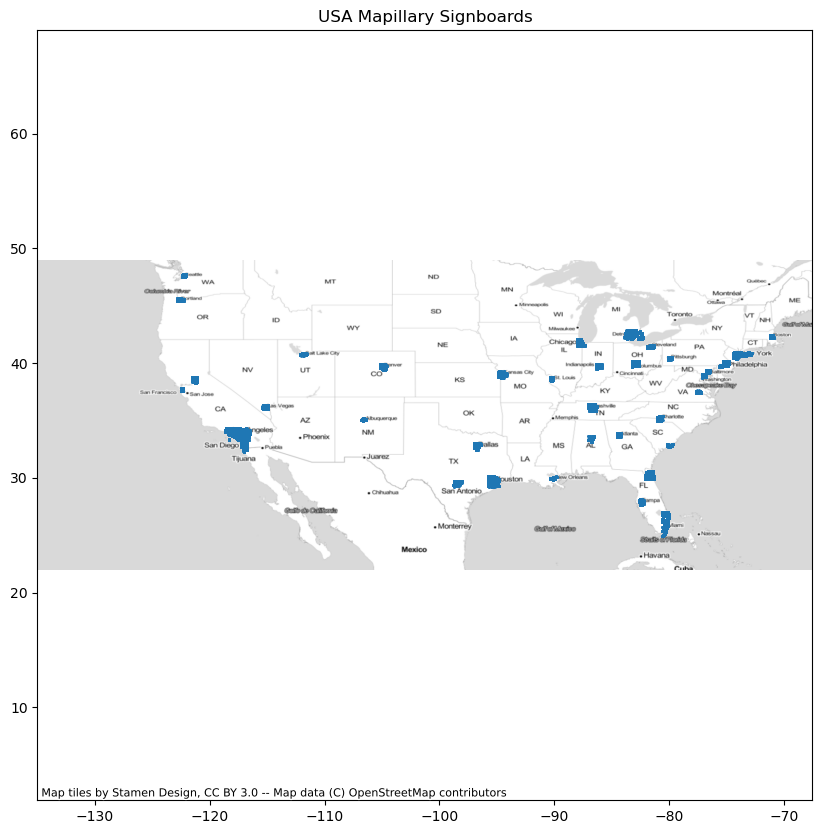

In [15]:
# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))

# Replace 'complete_uk' with your GeoDataFrame
complete_usa.plot(ax=ax, markersize=1)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=complete_usa.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('USA Mapillary Signboards')
plt.show()

# Canada Mapillary Signboards

In [7]:
# Directory where the GeoJSON files are located
geojson_dir = './mapillary_data/Canada'

# Initialize an empty list to store GeoDataFrames
gdfs = []

# Loop through all files in the directory
for filename in os.listdir(geojson_dir):
    if filename.endswith('.geojson'):
        file_path = os.path.join(geojson_dir, filename)
        gdf = gpd.read_file(file_path)
        gdfs.append(gdf)

# Concatenate all the GeoDataFrames into one
complete_canada = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)
complete_canada

,first_seen_at,id,last_seen_at,value,geometry
0,1438777542078,458724638524424,1438777542078,regulatory--stop--g1,POINT (-122.87327 49.30274)
1,1563913296000,746072706070706,1563913296000,warning--traffic-signals--g3,POINT (-122.91632 49.28780)
2,1563913291000,745745376103439,1563913291000,warning--junction-with-a-side-road-perpendicul...,POINT (-122.91755 49.28784)
3,1563913246000,491709128696496,1563913246000,complementary--obstacle-delineator--g3,POINT (-122.92551 49.28901)
4,1563913243000,492710718596337,1563913243000,regulatory--keep-right--g4,POINT (-122.92551 49.28901)
...,...,...,...,...,...
38537,1569888322000,2953438431586601,1569888322000,warning--traffic-merges-right--g1,POINT (-97.15234 49.85182)
38538,1569888319000,2953406924923085,1569888319000,regulatory--no-heavy-goods-vehicles--g1,POINT (-97.15177 49.85207)
38539,1563033894000,795731584644354,1563033894000,complementary--turn-right--g2,POINT (-96.83965 49.78037)
38540,1563033775000,432450907921826,1563033775000,regulatory--yield--g1,POINT (-96.82022 49.77236)


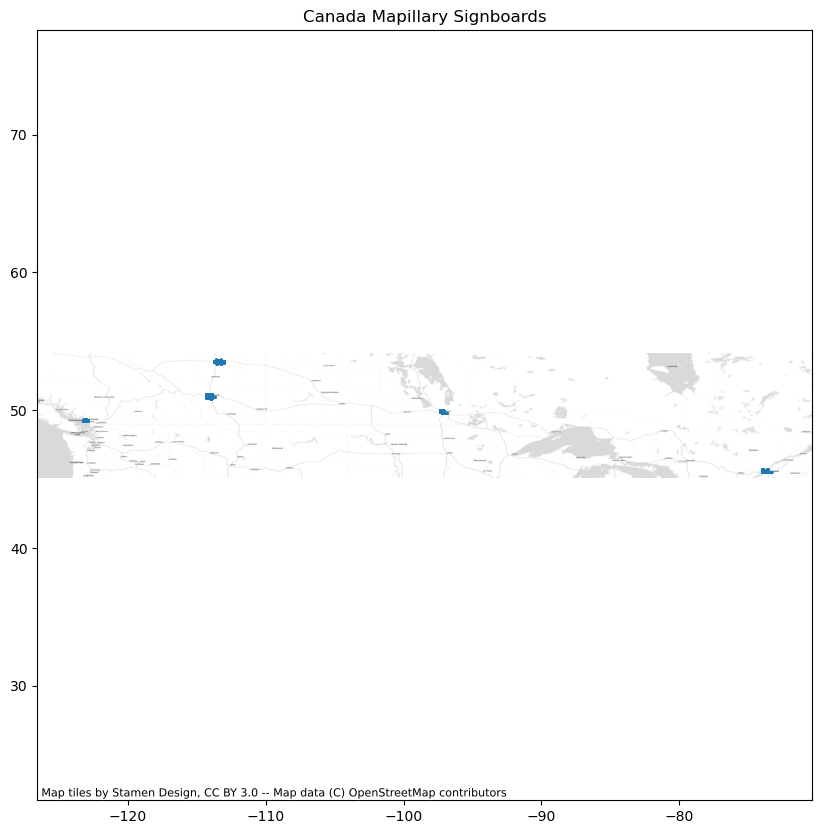

In [14]:
# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))

# Replace 'complete_uk' with your GeoDataFrame
complete_canada.plot(ax=ax, markersize=1)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=complete_canada.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('Canada Mapillary Signboards')
plt.show()

# UK Mapillary Signboards

In [9]:
# Directory where the GeoJSON files are located
geojson_dir = './mapillary_data/UK'

# Initialize an empty list to store GeoDataFrames
gdfs = []

# Loop through all files in the directory
for filename in os.listdir(geojson_dir):
    if filename.endswith('.geojson'):
        file_path = os.path.join(geojson_dir, filename)
        gdf = gpd.read_file(file_path)
        gdfs.append(gdf)

# Concatenate all the GeoDataFrames into one
complete_uk = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True), crs=gdfs[0].crs)
complete_uk

,first_seen_at,id,last_seen_at,value,geometry
0,1572351124500,171505731485056,1572351124500,information--highway-interchange--g1,POINT (4.66657 51.97803)
1,1572350510250,527050991805269,1572350510250,regulatory--yield--g1,POINT (4.66933 51.97821)
2,1554556501000,340133177455076,1554556501000,information--bike-route--g1,POINT (4.67057 51.97904)
3,1537354851609,148832637209698,1537354851609,regulatory--no-parking--g1,POINT (4.66807 51.98035)
4,1496929978721,2788930491421291,1496929978721,warning--road-bump--g1,POINT (4.67160 51.98037)
...,...,...,...,...,...
177666,1540207200000,956986578450676,1540207200000,regulatory--no-entry--g1,POINT (23.77772 38.03071)
177667,1506091265269,814525329187885,1506091265269,regulatory--no-right-turn--g1,POINT (23.77822 38.03072)
177668,1506091265269,1979928145490787,1506091265269,regulatory--priority-road--g1,POINT (23.77821 38.03072)
177669,1540135923000,166292475426136,1540135923000,regulatory--no-entry--g1,POINT (23.77810 38.03073)


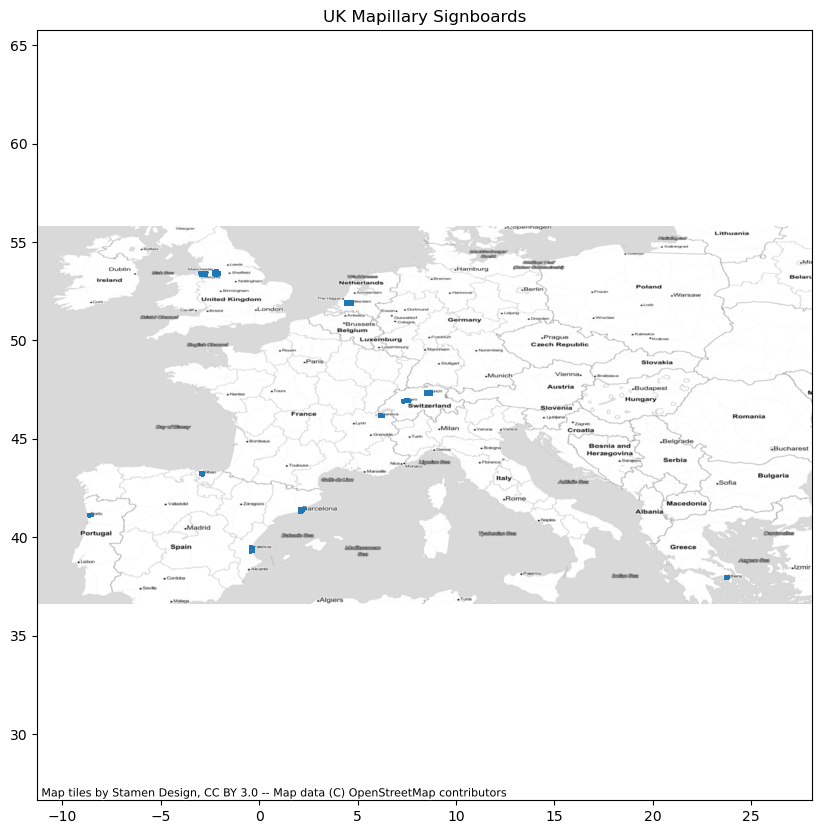

In [13]:
# Plot the points
fig, ax = plt.subplots(figsize=(10, 10))

# Replace 'complete_uk' with your GeoDataFrame
complete_uk.plot(ax=ax, markersize=1)  # Adjust markersize as needed

# Add a basemap using contextily (e.g., using the 'Stamen Toner Lite' style)
ctx.add_basemap(ax, crs=complete_uk.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

plt.axis('equal')  # Equal aspect ratio
plt.title('UK Mapillary Signboards')
plt.show()